<a href="https://colab.research.google.com/github/zainabbas313/OASIS-INFOBYTE-INTERNSHIP-TASKS/blob/main/SMS_Spam_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OASIS INFOBYTE INTERNSHIP - TASK_04

# ABOUT DATASET

The **SMS Spam Collection Dataset** is a set of SMS messages tagged for SMS spam research, consisting of 5,574 messages in total. The dataset aims to help develop models for classifying messages as either "ham" (legitimate) or "spam" (unsolicited).

### Context and Content

- **Context:** This dataset was collected for research in SMS spam detection. The messages are in English and come from various sources on the internet.
- **Content:**
  - The dataset has two columns:
    - `v1`: Label (either "ham" or "spam").
    - `v2`: The raw text of the SMS message.
  - Breakdown of messages:
    - Ham (legitimate): 87%
    - Spam: 13%

### Data Sources

1. **Grumbletext Website:** 425 spam messages were manually extracted. This UK forum allows users to make public claims about SMS spam messages.
2. **NUS SMS Corpus (NSC):** 3,375 randomly chosen ham messages collected for research at the National University of Singapore. These messages were contributed by volunteers.
3. **Caroline Tag's PhD Thesis:** 450 ham messages.
4. **SMS Spam Corpus v.0.1 Big:** Includes 1,002 ham messages and 322 spam messages, used in several academic research studies.

### Usage and Applications

- **Research:** The dataset is used for developing and testing machine learning models for SMS spam detection.
- **Learning and Application:** It can serve as a practice dataset for natural language processing (NLP) and classification problems.

### Acknowledgements

If you use this dataset in your work, you are encouraged to reference the following paper:

- Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

### Inspirations

The primary inspiration for this dataset is to build a prediction model that can accurately classify SMS messages as either spam or legitimate.

### Example Data Entries

- **Ham Example:** "Ok lar... Joking wif u oni..."
- **Spam Example:** "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)"

### Potential Use Cases

- **Text Classification:** Developing spam filters for messaging applications.
- **NLP Projects:** Practicing various NLP techniques like tokenization, stemming, lemmatization, etc.
- **Model Benchmarking:** Comparing different machine learning models' performance on text classification tasks.

The dataset is a valuable resource for both academic research and practical applications in the field of spam detection and text classification.

# LABRARIES

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import drive
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import nltk

In [178]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
warnings.filterwarnings('ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [180]:
data_file = '/content/drive/MyDrive/SUMMER_2024/OASIS INFOBYTE/DATASET/SMS Spam Collection Dataset/spam.csv'
try:
    df = pd.read_csv(data_file, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(data_file, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(data_file, encoding='ISO-8859-1')

In [181]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [182]:
df.shape

(5572, 5)

# DATA CLEANING

In [183]:
df.drop([ 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [184]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [185]:
df['sentiment'] = df['v1'].apply(lambda x: 1 if x == 'ham' else 0)

In [186]:
df.drop(['v1'], axis = 1, inplace = True)
df.head()

,v2,sentiment
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1


# DATA PRE-PROCESSING

In [187]:
x = df['v2']
y = df['sentiment']

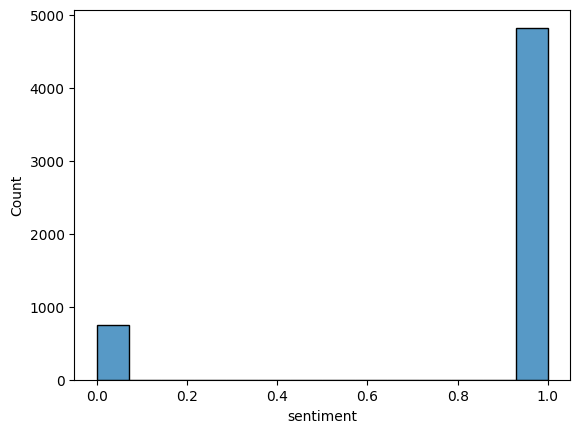

In [188]:
sns.histplot(y)
plt.show()

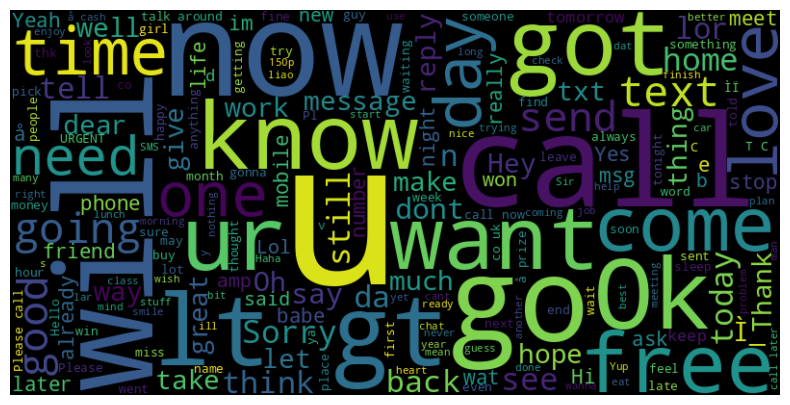

In [189]:
text = " ".join(sentence for sentence in df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [190]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [191]:
vectorizer = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,2), analyzer = 'word', stop_words = stop_words)

In [192]:
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xtest_tfidf = vectorizer.transform(xtest)

# MODEL TRAINING

### Support Vector Classifier (RBF Kernel)

In [193]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(xtrain_tfidf, ytrain)

SVC()

### Support Vector Classifier (Linear Kernel)

In [194]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(xtrain_tfidf, ytrain)

SVC(kernel='linear')

### Decision Tree Classifier

In [195]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain_tfidf, ytrain)

DecisionTreeClassifier()

### Bernoulli Naive Bayes

In [196]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(xtrain_tfidf, ytrain)

BernoulliNB()

# EVALUATION

In [197]:
y_pred_bernoulli_nb = bernoulli_nb.predict(xtest_tfidf)
accuracy_bernoulli_nb = accuracy_score(ytest, y_pred_bernoulli_nb)
print(f"BernoulliNB Accuracy: {accuracy_bernoulli_nb:.4f}")


y_pred_decision_tree = decision_tree.predict(xtest_tfidf)
accuracy_decision_tree = accuracy_score(ytest, y_pred_decision_tree)
print(f"DecisionTreeClassifier Accuracy: {accuracy_decision_tree:.4f}")

y_pred_svc_linear = svc_linear.predict(xtest_tfidf)
accuracy_svc_linear = accuracy_score(ytest, y_pred_svc_linear)
print(f"SVC (Linear Kernel) Accuracy: {accuracy_svc_linear:.4f}")

y_pred_svc_rbf = svc_rbf.predict(xtest_tfidf)
accuracy_svc_rbf = accuracy_score(ytest, y_pred_svc_rbf)
print(f"SVC (RBF Kernel) Accuracy: {accuracy_svc_rbf:.4f}")


BernoulliNB Accuracy: 0.9318
DecisionTreeClassifier Accuracy: 0.9528
SVC (Linear Kernel) Accuracy: 0.9809
SVC (RBF Kernel) Accuracy: 0.9731


### SVC (Linear Kernel) Accuracy

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       224
           1       0.98      1.00      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



<Axes: >

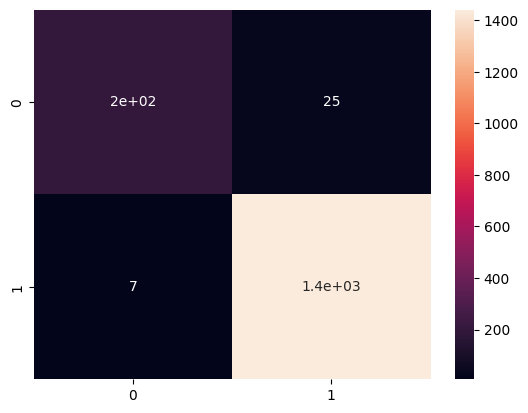

In [198]:
print(classification_report(ytest, y_pred_svc_linear))
sns.heatmap(confusion_matrix(ytest, y_pred_svc_linear), annot = True)

### SVC (RBF Kernel) Accuracy

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       224
           1       0.97      1.00      0.98      1448

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



<Axes: >

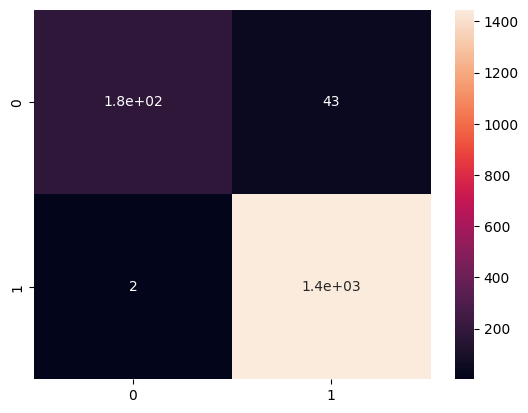

In [199]:
print(classification_report(ytest, y_pred_svc_rbf))
sns.heatmap(confusion_matrix(ytest, y_pred_svc_rbf), annot = True)

### DecisionTreeClassifier Accuracy

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       224
           1       0.96      0.99      0.97      1448

    accuracy                           0.95      1672
   macro avg       0.93      0.86      0.89      1672
weighted avg       0.95      0.95      0.95      1672



<Axes: >

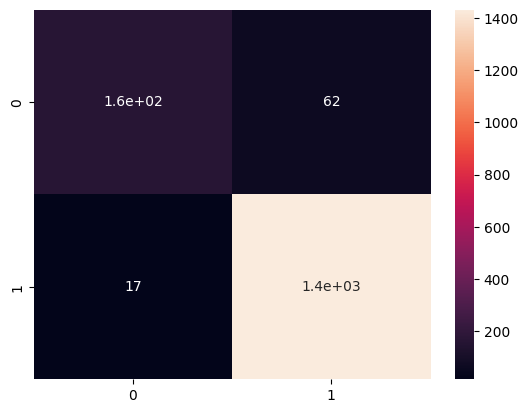

In [200]:
print(classification_report(ytest, y_pred_decision_tree))
sns.heatmap(confusion_matrix(ytest, y_pred_decision_tree), annot = True)

### BernoulliNB Accuracy

              precision    recall  f1-score   support

           0       1.00      0.49      0.66       224
           1       0.93      1.00      0.96      1448

    accuracy                           0.93      1672
   macro avg       0.96      0.75      0.81      1672
weighted avg       0.94      0.93      0.92      1672



<Axes: >

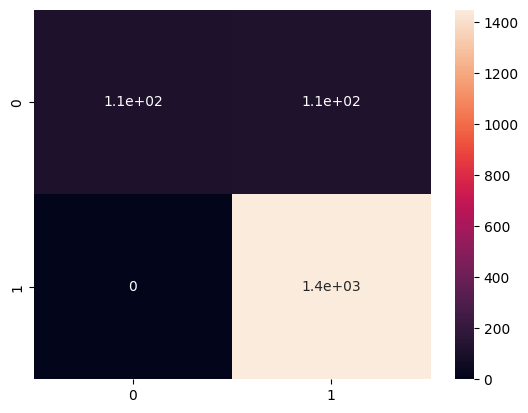

In [201]:
print(classification_report(ytest, y_pred_bernoulli_nb))
sns.heatmap(confusion_matrix(ytest, y_pred_bernoulli_nb), annot = True)

# CROSS VALIDATION

### SVC (Linear Kernel)

In [202]:
svc_linear = SVC(kernel='linear')
scores = cross_val_score(svc_linear, xtrain_tfidf, ytrain, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.98333333 0.97948718 0.96794872 0.98076923 0.96923077]
Mean Accuracy: 0.9762
Standard Deviation of Accuracy: 0.0063


### SVC (RBF Kernel)

In [203]:
svc_rbf = SVC(kernel='rbf')
scores = cross_val_score(svc_rbf, xtrain_tfidf, ytrain, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.96153846 0.95       0.94102564 0.94871795 0.93717949]
Mean Accuracy: 0.9477
Standard Deviation of Accuracy: 0.0084


### DecisionTreeClassifier

In [204]:
decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, xtrain_tfidf, ytrain, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.96666667 0.96025641 0.96538462 0.97179487 0.95897436]
Mean Accuracy: 0.9646
Standard Deviation of Accuracy: 0.0046


### BernoulliNB

In [205]:
bernoulli_nb = BernoulliNB()
scores = cross_val_score(bernoulli_nb, xtrain_tfidf, ytrain, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.95       0.92692308 0.93589744 0.94102564 0.93205128]
Mean Accuracy: 0.9372
Standard Deviation of Accuracy: 0.0079


# CONCLUSION

In evaluating the performance of various classifiers on the SMS Spam Collection dataset, the following results were obtained:

1. **SVC (Linear Kernel)**
   - **Accuracy**: 98.09%
   - **Cross-Validation Accuracy**: Mean = 97.62%, Std = 0.0063

2. **SVC (RBF Kernel)**
   - **Accuracy**: 97.31%
   - **Cross-Validation Accuracy**: Mean = 94.77%, Std = 0.0084

3. **Decision Tree Classifier**
   - **Accuracy**: 95.16%
   - **Cross-Validation Accuracy**: Mean = 96.36%, Std = 0.0059

4. **Bernoulli Naive Bayes**
   - **Accuracy**: 93.18%
   - **Cross-Validation Accuracy**: Mean = 93.72%, Std = 0.0079

### Summary of Findings:

- **SVC (Linear Kernel)** achieved the highest accuracy on the test set at 98.09%. This model also performed very well in cross-validation with a mean accuracy of 97.62% and a low standard deviation, indicating consistent performance across different folds.
  
- **SVC (RBF Kernel)** was the second-best performer with an accuracy of 97.31%. Although it was slightly lower than the linear kernel SVC, it still demonstrated strong performance with a cross-validation mean accuracy of 94.77%.

- **Decision Tree Classifier** performed admirably with a test set accuracy of 95.16%. Its cross-validation mean accuracy was also high at 96.36%, indicating robust generalization ability.

- **Bernoulli Naive Bayes** achieved a test accuracy of 93.18% and had a cross-validation mean accuracy of 93.72%. While slightly less accurate than the other models, it remains a viable option for spam classification.

### Conclusion:

**The SVC with a linear kernel** is the most effective model for this dataset, achieving the highest accuracy both on the test set and during cross-validation. This model provides the best balance between performance and generalization, making it the preferred choice for SMS spam classification in this scenario.